# Multi-wavelength data tutorial for galaxies

This notebook shows: 
- how to acess multi-wavelength imaging data using the skyview data base.
- how to make high quality plots
- how to make 3 colour plots of astronomical data
- how to make overlays of images


In [2]:
# loading packages

import numpy as np
import matplotlib.pyplot as plt

# standard astronomy packages
from astropy.io import fits
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from reproject import reproject_interp

# accessing data from SkyView
from astroquery.skyview import SkyView
from astroquery.vizier import Vizier

# for 3 colour images
from astropy.visualization import make_lupton_rgb
from astropy.utils.data import get_pkg_data_filename

## Retrieve image from an online archive
We are going to use skyview 

You can check the name of the available survey data here: https://astroquery.readthedocs.io/en/latest/skyview/skyview.html  (this is a list of names that can go into the survey argument)

You can also use the skyview website directly to check if the particular survey has data for that galaxy: https://skyview.gsfc.nasa.gov/current/cgi/query.pl just type in the name or the coordinates of the galaxy and select the surveys you are interested in.

Generaly the DSS2 Survey (2nd Digitised Sky Survey) is a good start since it covers the whole sky. 'Blue' referes to the band in which the data was taken. Blue is taken with a filter that lets trough the blue optical light from the galaxy.

In [10]:
# this line grabs the image from the remote server
# The example galaxies are from the Virgo cluster

name = 'NGC 4321' # spiral galaxy
#name = 'NGC 4262'  # elliptical galaxy
#name = 'NGC 4388' #spiral galaxy

path = SkyView.get_images(position=name, width=0.3*u.deg, height=0.3*u.deg, survey=['DSS2 Blue'], pixels=[900,900])

# this line puts the data into a fits image
hdulist_DSS2 = path[0]
d_DSS2 = hdulist_DSS2[0].data
h_DSS2 = hdulist_DSS2[0].header

## Check the data

(900, 900)


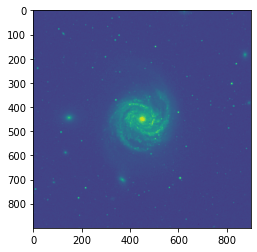

In [11]:
# check the dimensions of the data
print(d_DSS2.shape)

# quick look
plt.imshow(d_DSS2)

In [9]:
# print the full header
# print(h_DSS2) 

# print the top part of the header which tends to have the relevant information
print(h_DSS2[0:30])

SIMPLE  =                    T / Written by SkyView Mon Sep 04 15:24:19 EDT 2023BITPIX  =                  -32 / 4 byte floating point                          NAXIS   =                    2 / Two dimensional image                          NAXIS1  =                  900 / Width of image                                 NAXIS2  =                  900 / Height of image                                CRVAL1  =              185.729 / Reference longitude                            CRVAL2  =              15.8223 / Reference latitude                             RADESYS = 'FK5     '           / Coordinate system                              EQUINOX =               2000.0 / Epoch of the equinox                           CTYPE1  = 'RA---TAN'           / Coordinates -- projection                      CTYPE2  = 'DEC--TAN'           / Coordinates -- projection                      CRPIX1  =                450.5 / X reference pixel                              CRPIX2  =                450.5 / Y refer

## Make high quality images

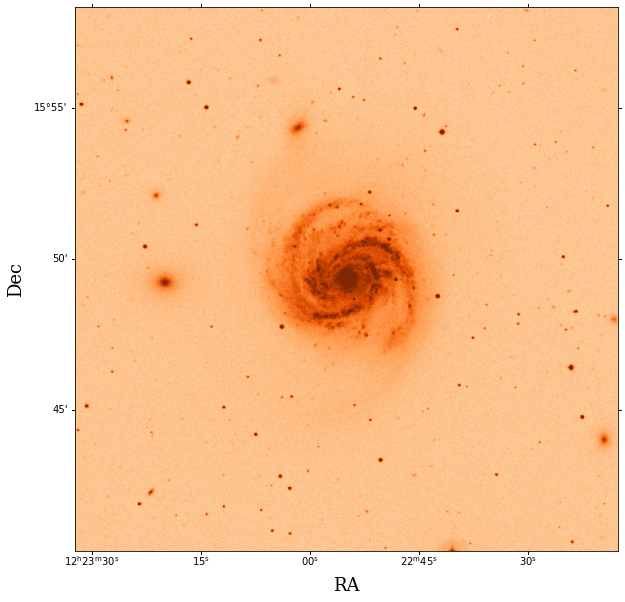

In [14]:
# lets make a nice figure

fig = plt.figure(figsize=(11,10))

# to correctly label the axes we are using the WCS package from astropy 
# WCS stands for World Coordinate System
ax = fig.add_subplot(1,1,1, projection=WCS(h_DSS2))
ax.imshow(d_DSS2, cmap='Oranges', vmax=np.percentile(d_DSS2, 99.8))
ax.set_xlabel('RA', size=18,family='serif')
ax.set_ylabel('Dec', size=18,family='serif')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

fig.savefig('{}_DDS2.png'.format(name), dpi=200)

# Note that the HI disk is very similar in size to the stellar disk



## Make 3 colour images

For this we will more modern data from SDSS survey (https://classic.sdss.org/home.php)

Note that this survey uses different filters (different wavelengths) comapred to the DSS survey.

In [15]:
path = SkyView.get_images(position=name, width=0.3*u.deg, height=0.3*u.deg, survey=['SDSSg'], pixels=[900,900])

# this line puts the data into a fits image
hdulist_SDSS_g = path[0]
d_SDSS_g = hdulist_SDSS_g[0].data
h_SDSS_g = hdulist_SDSS_g[0].header

path = SkyView.get_images(position=name, width=0.3*u.deg, height=0.3*u.deg, survey=['SDSSr'], pixels=[900,900])

# this line puts the data into a fits image
hdulist_SDSS_r = path[0]
d_SDSS_r = hdulist_SDSS_r[0].data
h_SDSS_r = hdulist_SDSS_r[0].header

path = SkyView.get_images(position=name, width=0.3*u.deg, height=0.3*u.deg, survey=['SDSSi'], pixels=[900,900])

# this line puts the data into a fits image
hdulist_SDSS_i = path[0]
d_SDSS_i = hdulist_SDSS_i[0].data
h_SDSS_i = hdulist_SDSS_i[0].header

In [16]:
# check the SDSS data

print(h_SDSS_r[0:35])

SIMPLE  =                    T / Written by SkyView Fri Sep 01 10:53:13 EDT 2023BITPIX  =                  -32 / 4 byte floating point                          NAXIS   =                    2 / Two dimensional image                          NAXIS1  =                  900 / Width of image                                 NAXIS2  =                  900 / Height of image                                CRVAL1  =              185.729 / Reference longitude                            CRVAL2  =              15.8223 / Reference latitude                             RADESYS = 'FK5     '           / Coordinate system                              EQUINOX =               2000.0 / Epoch of the equinox                           CTYPE1  = 'RA---TAN'           / Coordinates -- projection                      CTYPE2  = 'DEC--TAN'           / Coordinates -- projection                      CRPIX1  =                450.5 / X reference pixel                              CRPIX2  =                450.5 / Y refer

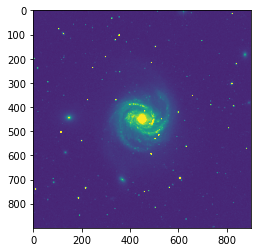

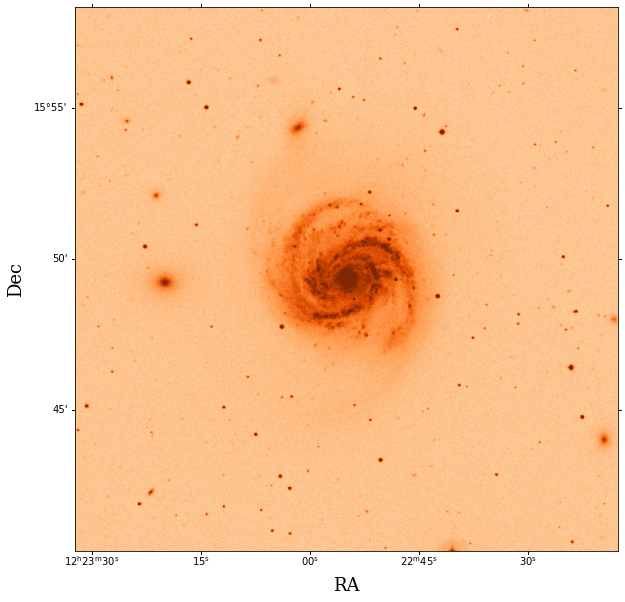

In [17]:
plt.imshow(d_SDSS_r, vmax=np.percentile(d_SDSS_r, 99.8))


fig = plt.figure(figsize=(11,10))
ax = fig.add_subplot(1,1,1, projection=WCS(h_DSS2))
ax.imshow(d_DSS2, cmap='Oranges', vmax=np.percentile(d_DSS2, 99.8))
ax.set_xlabel('RA', size=18,family='serif')
ax.set_ylabel('Dec', size=18,family='serif')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

fig.savefig('{}_DDS2.png'.format(name), dpi=200)

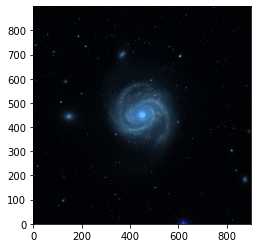

In [20]:
# assigning colours to the image layers
g = d_SDSS_g
r = d_SDSS_r
i = d_SDSS_i

# making a quick image
# A lower Q and stretch parameter make the fainter features in the image visible
rgb_default = make_lupton_rgb(g, r, i, Q=5, stretch=0.8, filename="test.jpeg")

# checking the data
plt.imshow(rgb_default, origin='lower')

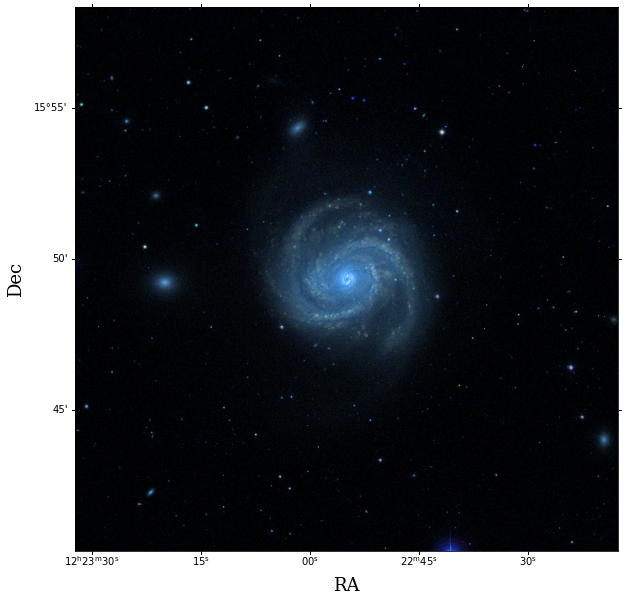

In [21]:
# making a plot
fig = plt.figure(figsize=(11,10))

ax = fig.add_subplot(1,1,1, projection=WCS(h_SDSS_g))
plt.imshow(rgb_default, origin='lower')
ax.set_xlabel('RA', size=18,family='serif')
ax.set_ylabel('Dec', size=18,family='serif')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

fig.savefig('{}_SDSS.png'.format(name), dpi=200)


## Compare data from different wavelengths

GALEX NUV, SDSS r, 2MASS J, WISE 3.4, and NVSS data

What is the difference? What to do we see in the different bands?

In [22]:
# get the data

# UV
path = SkyView.get_images(position=name, width=0.3*u.deg, height=0.3*u.deg, survey=['GALEX Near UV'], pixels=[900,900])

hdulist_GALEX_NUV = path[0]
d_GALEX_NUV = hdulist_GALEX_NUV[0].data
h_GALEX_NUV = hdulist_GALEX_NUV[0].header

# near infrared
path = SkyView.get_images(position=name, width=0.3*u.deg, height=0.3*u.deg, survey=['2MASS-J'], pixels=[900,900])

hdulist_2MASS_J = path[0]
d_2MASS_J = hdulist_2MASS_J[0].data
h_2MASS_J = hdulist_2MASS_J[0].header

# infrared
path = SkyView.get_images(position=name, width=0.3*u.deg, height=0.3*u.deg, survey=['WISE 3.4'], pixels=[900,900])

hdulist_WISE_34 = path[0]
d_WISE_34 = hdulist_WISE_34[0].data
h_WISE_34 = hdulist_WISE_34[0].header

# radio 
path = SkyView.get_images(position=name, width=0.3*u.deg, height=0.3*u.deg, survey=['NVSS'], pixels=[900,900])

hdulist_NVSS = path[0]
d_NVSS = hdulist_NVSS[0].data
h_NVSS = hdulist_NVSS[0].header

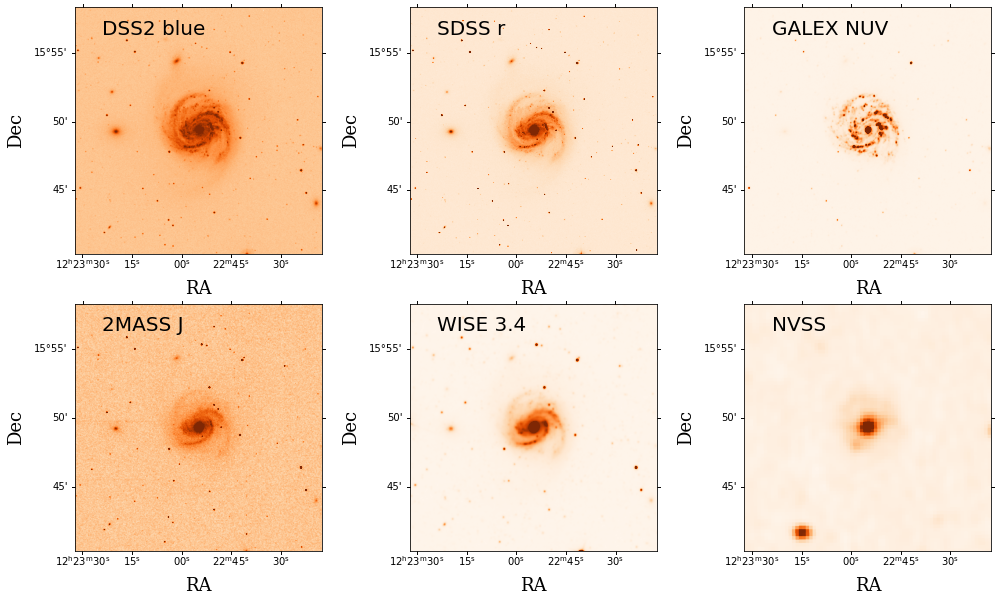

In [23]:
# comapre images

fig = plt.figure(figsize=(17,10))

ax1 = fig.add_subplot(2,3,1, projection=WCS(h_DSS2))
ax1.text(100, 800 ,'DSS2 blue', fontsize=20)
ax1.imshow(d_DSS2, cmap='Oranges', vmax=np.percentile(d_DSS2, 99.8))
ax1.set_xlabel('RA', size=18,family='serif')
ax1.set_ylabel('Dec', size=18,family='serif')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

ax2 = fig.add_subplot(2,3,2, projection=WCS(h_SDSS_r))
ax2.text(100, 800 ,'SDSS r', fontsize=20)
ax2.imshow(d_SDSS_r, cmap='Oranges', vmax=np.percentile(d_SDSS_r, 99.8))
ax2.set_xlabel('RA', size=18,family='serif')
ax2.set_ylabel('Dec', size=18,family='serif')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

ax3 = fig.add_subplot(2,3,3, projection=WCS(h_DSS2))
ax3.text(100, 800 ,'GALEX NUV', fontsize=20)
ax3.imshow(d_GALEX_NUV, cmap='Oranges', vmax=np.percentile(d_GALEX_NUV, 99.8))
ax3.set_xlabel('RA', size=18,family='serif')
ax3.set_ylabel('Dec', size=18,family='serif')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

ax4 = fig.add_subplot(2,3,4, projection=WCS(h_DSS2))
ax4.text(100, 800 ,'2MASS J', fontsize=20)
ax4.imshow(d_2MASS_J, cmap='Oranges', vmax=np.percentile(d_2MASS_J, 99.8))
ax4.set_xlabel('RA', size=18,family='serif')
ax4.set_ylabel('Dec', size=18,family='serif')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

ax5 = fig.add_subplot(2,3,5, projection=WCS(h_DSS2))
ax5.text(100, 800 ,'WISE 3.4', fontsize=20)
ax5.imshow(d_WISE_34, cmap='Oranges', vmax=np.percentile(d_WISE_34, 99.8))
ax5.set_xlabel('RA', size=18,family='serif')
ax5.set_ylabel('Dec', size=18,family='serif')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

ax6 = fig.add_subplot(2,3,6, projection=WCS(h_DSS2))
ax6.text(100, 800 ,'NVSS', fontsize=20)
ax6.imshow(d_NVSS, cmap='Oranges', vmax=np.percentile(d_NVSS, 99.8))
ax6.set_xlabel('RA', size=18,family='serif')
ax6.set_ylabel('Dec', size=18,family='serif')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

fig.savefig('{}_compare.png'.format(name), dpi=200)

## Making an overlay

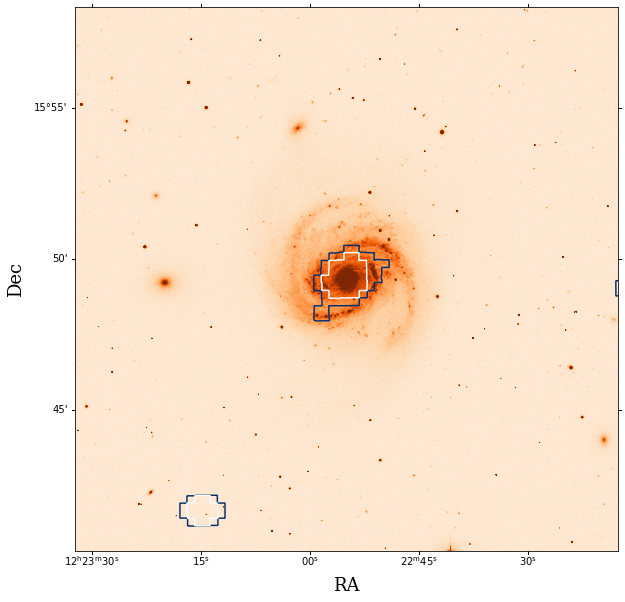

In [24]:
# reproject the data onto the same pixel grid
# we are reprojecting the radio data onto the grid of the optical data, since the resolution of the optical data is generally better
NVSS_reprojected, footprint = reproject_interp(hdulist_NVSS, h_SDSS_r)


# calculating the rms of the radio data - this can be used for the contours
rms_NVSS = np.sqrt(np.mean(NVSS_reprojected**2))

fig = plt.figure(figsize=(11,10))
ax = fig.add_subplot(1,1,1, projection=WCS(h_SDSS_r))
ax.imshow(d_SDSS_r, cmap='Oranges', vmax=np.percentile(d_SDSS_r, 99.8))
ax.contour(NVSS_reprojected, levels=rms_NVSS*np.arange(3,7,2), cmap='Blues_r')
ax.set_xlabel('RA', size=18,family='serif')
ax.set_ylabel('Dec', size=18,family='serif')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

fig.savefig('{}_overlay.png'.format(name), dpi=200)

